In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

IS_LOCAL = False

if IS_LOCAL:
    PATH = "../input/credit-card-fraud-detection"
else:
    PATH = "./input"
    
print(os.listdir(PATH))

data = pd.read_csv(PATH + "/creditcard.csv")
data.head()

['creditcard.csv', 'fraudTest.csv', 'fraudTrain.csv']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# data Analysis
pd.set_option("display.float", "{:.2f}".format)

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [3]:
# checking the missing Data set

data.isnull().sum().sum()

0

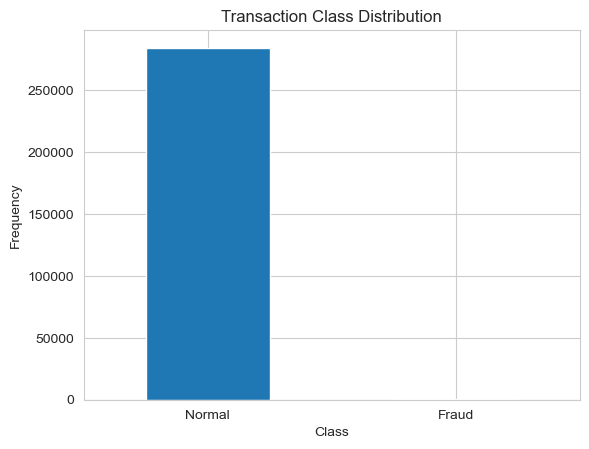

In [4]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
#valid transactions in the data set
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [7]:
#amount difference in the dataset

pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


In [8]:
#Time frame of fraudlent transaction
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


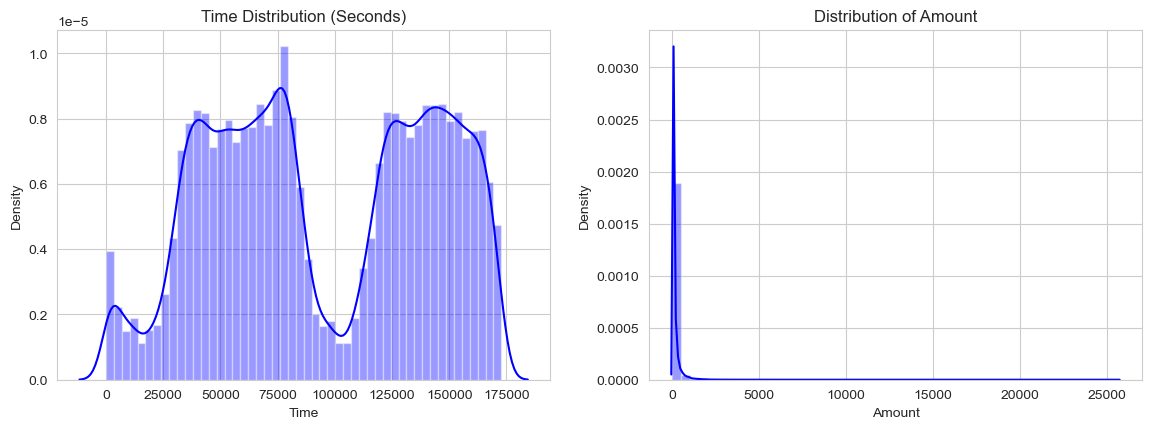

In [9]:
#Distibution of the feautres
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.distplot(data['Time'], color='blue');

# plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');

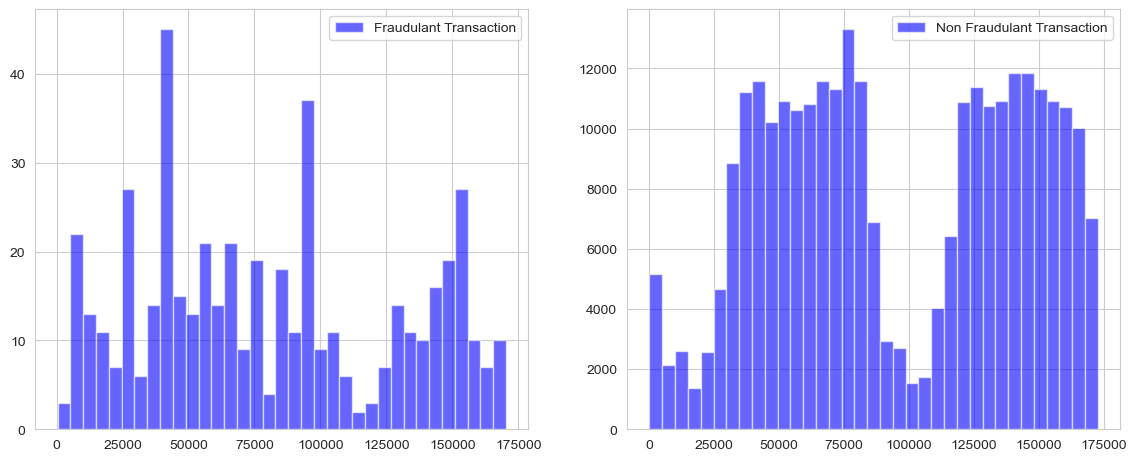

In [10]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction"
)
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction"
)
plt.legend()

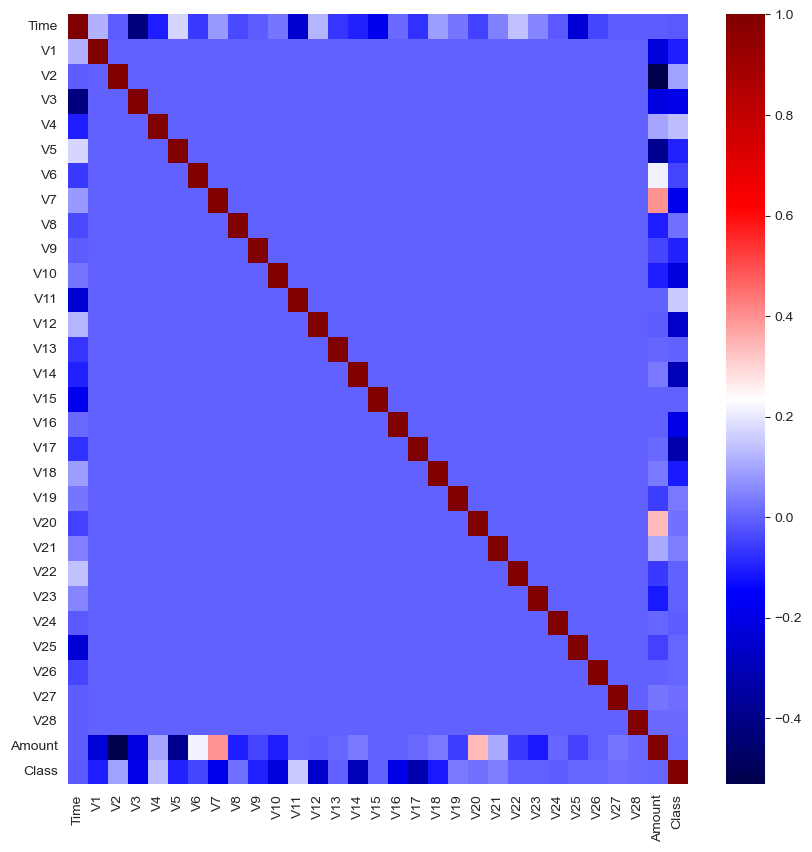

In [11]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

In [12]:
#Data Preprosseing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [13]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [15]:
#Ada Boost 

scores_dict = {}

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['AdaBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

acc_ada = round(accuracy_score(y_test, y_test_pred)*100,2)


Train Result:
Accuracy Score: 99.92%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.80      1.00       0.90          1.00
recall         1.00   0.73      1.00       0.87          1.00
f1-score       1.00   0.76      1.00       0.88          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159150     54]
 [    77    210]]

Test Result:
Accuracy Score: 99.93%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.80      1.00       0.90          1.00
recall        1.00   0.76      1.00       0.88          1.00
f1-score      1.00   0.78      1.00       0.89          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

In [16]:
#XGBoost Model
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}
acc_xgboost = round(accuracy_score(y_test, y_test_pred)*100,2)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.95      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.88      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

In [17]:
#Cat Boost
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}
acc_catboost = round(accuracy_score(y_test, y_test_pred)*100,2)

Learning rate set to 0.089847
0:	learn: 0.3914641	total: 112ms	remaining: 1m 51s
1:	learn: 0.2368429	total: 136ms	remaining: 1m 8s
2:	learn: 0.1341782	total: 156ms	remaining: 51.8s
3:	learn: 0.0788514	total: 173ms	remaining: 43.2s
4:	learn: 0.0482948	total: 192ms	remaining: 38.2s
5:	learn: 0.0315326	total: 209ms	remaining: 34.7s
6:	learn: 0.0213628	total: 228ms	remaining: 32.4s
7:	learn: 0.0153604	total: 247ms	remaining: 30.7s
8:	learn: 0.0115137	total: 265ms	remaining: 29.2s
9:	learn: 0.0090128	total: 285ms	remaining: 28.2s
10:	learn: 0.0071550	total: 304ms	remaining: 27.3s
11:	learn: 0.0060638	total: 323ms	remaining: 26.6s
12:	learn: 0.0052453	total: 341ms	remaining: 25.9s
13:	learn: 0.0046542	total: 359ms	remaining: 25.3s
14:	learn: 0.0042229	total: 377ms	remaining: 24.8s
15:	learn: 0.0038780	total: 396ms	remaining: 24.4s
16:	learn: 0.0036112	total: 414ms	remaining: 24s
17:	learn: 0.0034152	total: 433ms	remaining: 23.6s
18:	learn: 0.0032510	total: 451ms	remaining: 23.3s
19:	learn: 0

160:	learn: 0.0012326	total: 4.05s	remaining: 21.1s
161:	learn: 0.0012291	total: 4.08s	remaining: 21.1s
162:	learn: 0.0012280	total: 4.11s	remaining: 21.1s
163:	learn: 0.0012266	total: 4.13s	remaining: 21.1s
164:	learn: 0.0012199	total: 4.16s	remaining: 21s
165:	learn: 0.0012135	total: 4.18s	remaining: 21s
166:	learn: 0.0012109	total: 4.21s	remaining: 21s
167:	learn: 0.0012013	total: 4.24s	remaining: 21s
168:	learn: 0.0011997	total: 4.26s	remaining: 21s
169:	learn: 0.0011975	total: 4.29s	remaining: 20.9s
170:	learn: 0.0011950	total: 4.32s	remaining: 20.9s
171:	learn: 0.0011937	total: 4.34s	remaining: 20.9s
172:	learn: 0.0011858	total: 4.37s	remaining: 20.9s
173:	learn: 0.0011818	total: 4.39s	remaining: 20.8s
174:	learn: 0.0011801	total: 4.41s	remaining: 20.8s
175:	learn: 0.0011772	total: 4.44s	remaining: 20.8s
176:	learn: 0.0011728	total: 4.47s	remaining: 20.8s
177:	learn: 0.0011700	total: 4.5s	remaining: 20.8s
178:	learn: 0.0011608	total: 4.52s	remaining: 20.7s
179:	learn: 0.0011524	t

323:	learn: 0.0007535	total: 8.47s	remaining: 17.7s
324:	learn: 0.0007525	total: 8.51s	remaining: 17.7s
325:	learn: 0.0007492	total: 8.54s	remaining: 17.7s
326:	learn: 0.0007479	total: 8.57s	remaining: 17.6s
327:	learn: 0.0007457	total: 8.6s	remaining: 17.6s
328:	learn: 0.0007442	total: 8.63s	remaining: 17.6s
329:	learn: 0.0007434	total: 8.66s	remaining: 17.6s
330:	learn: 0.0007414	total: 8.69s	remaining: 17.6s
331:	learn: 0.0007400	total: 8.72s	remaining: 17.5s
332:	learn: 0.0007382	total: 8.75s	remaining: 17.5s
333:	learn: 0.0007363	total: 8.78s	remaining: 17.5s
334:	learn: 0.0007345	total: 8.81s	remaining: 17.5s
335:	learn: 0.0007334	total: 8.84s	remaining: 17.5s
336:	learn: 0.0007317	total: 8.87s	remaining: 17.5s
337:	learn: 0.0007300	total: 8.9s	remaining: 17.4s
338:	learn: 0.0007283	total: 8.93s	remaining: 17.4s
339:	learn: 0.0007252	total: 8.96s	remaining: 17.4s
340:	learn: 0.0007233	total: 8.98s	remaining: 17.4s
341:	learn: 0.0007216	total: 9.01s	remaining: 17.3s
342:	learn: 0.

487:	learn: 0.0004385	total: 13.6s	remaining: 14.3s
488:	learn: 0.0004378	total: 13.6s	remaining: 14.2s
489:	learn: 0.0004375	total: 13.7s	remaining: 14.2s
490:	learn: 0.0004369	total: 13.7s	remaining: 14.2s
491:	learn: 0.0004359	total: 13.7s	remaining: 14.2s
492:	learn: 0.0004352	total: 13.8s	remaining: 14.2s
493:	learn: 0.0004333	total: 13.8s	remaining: 14.1s
494:	learn: 0.0004322	total: 13.8s	remaining: 14.1s
495:	learn: 0.0004305	total: 13.9s	remaining: 14.1s
496:	learn: 0.0004299	total: 13.9s	remaining: 14.1s
497:	learn: 0.0004268	total: 13.9s	remaining: 14s
498:	learn: 0.0004259	total: 14s	remaining: 14s
499:	learn: 0.0004204	total: 14s	remaining: 14s
500:	learn: 0.0004202	total: 14s	remaining: 14s
501:	learn: 0.0004199	total: 14s	remaining: 13.9s
502:	learn: 0.0004191	total: 14.1s	remaining: 13.9s
503:	learn: 0.0004168	total: 14.1s	remaining: 13.9s
504:	learn: 0.0004146	total: 14.1s	remaining: 13.8s
505:	learn: 0.0004143	total: 14.2s	remaining: 13.8s
506:	learn: 0.0004141	total:

650:	learn: 0.0002694	total: 18.4s	remaining: 9.86s
651:	learn: 0.0002688	total: 18.4s	remaining: 9.84s
652:	learn: 0.0002658	total: 18.5s	remaining: 9.81s
653:	learn: 0.0002655	total: 18.5s	remaining: 9.78s
654:	learn: 0.0002652	total: 18.5s	remaining: 9.75s
655:	learn: 0.0002649	total: 18.5s	remaining: 9.72s
656:	learn: 0.0002645	total: 18.6s	remaining: 9.7s
657:	learn: 0.0002644	total: 18.6s	remaining: 9.67s
658:	learn: 0.0002642	total: 18.6s	remaining: 9.64s
659:	learn: 0.0002634	total: 18.7s	remaining: 9.61s
660:	learn: 0.0002630	total: 18.7s	remaining: 9.58s
661:	learn: 0.0002627	total: 18.7s	remaining: 9.55s
662:	learn: 0.0002624	total: 18.7s	remaining: 9.52s
663:	learn: 0.0002623	total: 18.8s	remaining: 9.49s
664:	learn: 0.0002606	total: 18.8s	remaining: 9.46s
665:	learn: 0.0002599	total: 18.8s	remaining: 9.44s
666:	learn: 0.0002596	total: 18.8s	remaining: 9.4s
667:	learn: 0.0002594	total: 18.9s	remaining: 9.38s
668:	learn: 0.0002588	total: 18.9s	remaining: 9.35s
669:	learn: 0.

810:	learn: 0.0001743	total: 23.1s	remaining: 5.38s
811:	learn: 0.0001742	total: 23.1s	remaining: 5.35s
812:	learn: 0.0001736	total: 23.1s	remaining: 5.32s
813:	learn: 0.0001731	total: 23.2s	remaining: 5.29s
814:	learn: 0.0001726	total: 23.2s	remaining: 5.26s
815:	learn: 0.0001724	total: 23.2s	remaining: 5.24s
816:	learn: 0.0001722	total: 23.3s	remaining: 5.21s
817:	learn: 0.0001721	total: 23.3s	remaining: 5.18s
818:	learn: 0.0001714	total: 23.3s	remaining: 5.15s
819:	learn: 0.0001714	total: 23.3s	remaining: 5.12s
820:	learn: 0.0001710	total: 23.4s	remaining: 5.09s
821:	learn: 0.0001708	total: 23.4s	remaining: 5.07s
822:	learn: 0.0001707	total: 23.4s	remaining: 5.04s
823:	learn: 0.0001705	total: 23.5s	remaining: 5.01s
824:	learn: 0.0001703	total: 23.5s	remaining: 4.99s
825:	learn: 0.0001697	total: 23.5s	remaining: 4.96s
826:	learn: 0.0001696	total: 23.6s	remaining: 4.93s
827:	learn: 0.0001688	total: 23.6s	remaining: 4.9s
828:	learn: 0.0001687	total: 23.6s	remaining: 4.87s
829:	learn: 0

970:	learn: 0.0001297	total: 28.3s	remaining: 845ms
971:	learn: 0.0001296	total: 28.3s	remaining: 816ms
972:	learn: 0.0001295	total: 28.3s	remaining: 786ms
973:	learn: 0.0001295	total: 28.4s	remaining: 757ms
974:	learn: 0.0001293	total: 28.4s	remaining: 728ms
975:	learn: 0.0001290	total: 28.4s	remaining: 699ms
976:	learn: 0.0001284	total: 28.5s	remaining: 670ms
977:	learn: 0.0001283	total: 28.5s	remaining: 641ms
978:	learn: 0.0001282	total: 28.5s	remaining: 611ms
979:	learn: 0.0001278	total: 28.5s	remaining: 582ms
980:	learn: 0.0001276	total: 28.6s	remaining: 553ms
981:	learn: 0.0001273	total: 28.6s	remaining: 524ms
982:	learn: 0.0001271	total: 28.6s	remaining: 495ms
983:	learn: 0.0001270	total: 28.7s	remaining: 466ms
984:	learn: 0.0001269	total: 28.7s	remaining: 437ms
985:	learn: 0.0001265	total: 28.7s	remaining: 408ms
986:	learn: 0.0001264	total: 28.8s	remaining: 379ms
987:	learn: 0.0001256	total: 28.8s	remaining: 350ms
988:	learn: 0.0001256	total: 28.8s	remaining: 321ms
989:	learn: 

In [18]:
#Ligt GBM'
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}
acc_lightGBM = round(accuracy_score(y_test, y_test_pred)*100,2)

Train Result:
Accuracy Score: 99.58%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.23      1.00       0.62          1.00
recall         1.00   0.59      1.00       0.79          1.00
f1-score       1.00   0.33      1.00       0.67          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[158652    552]
 [   119    168]]

Test Result:
Accuracy Score: 99.50%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.16      0.99       0.58          1.00
recall        1.00   0.53      0.99       0.76          0.99
f1-score      1.00   0.25      0.99       0.62          1.00
support   85307.00 136.00      0.99   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

<AxesSubplot:>

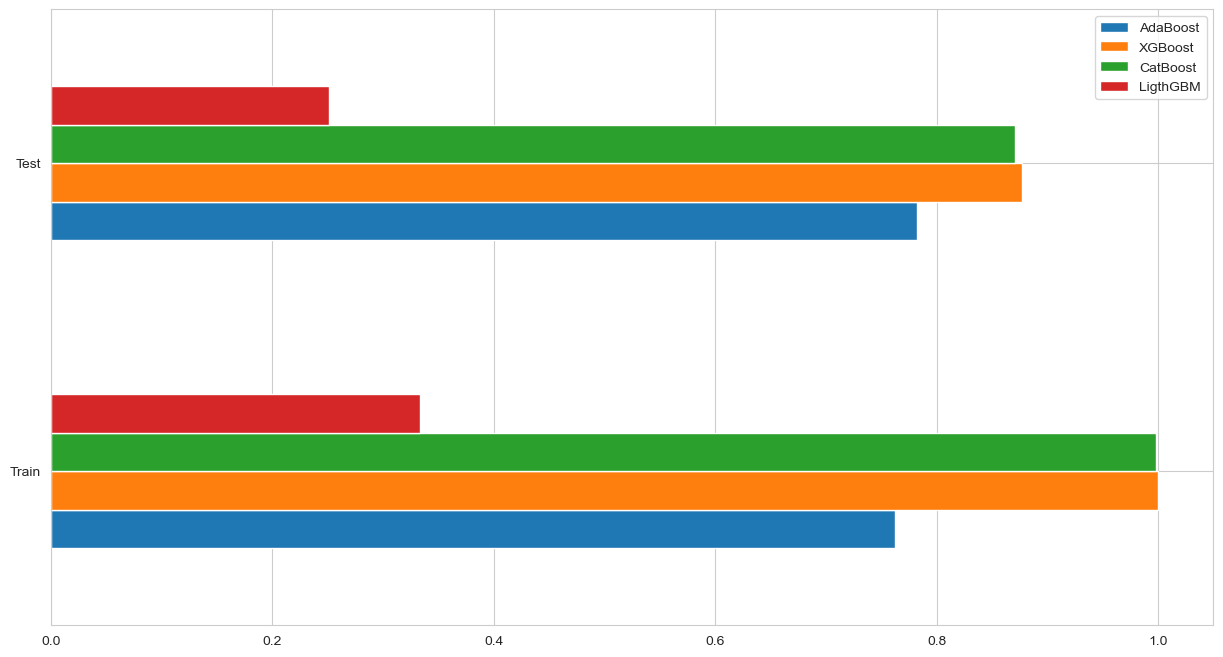

In [19]:
#Model Comparison
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

In [20]:
models = pd.DataFrame({"Model":['Ada boost','XGBoost','CatBoost','LigthGBM']

,"Score": [acc_ada,acc_xgboost,acc_catboost,acc_lightGBM]})
    
models.sort_values(by='Score',ascending=False)

,Model,Score
1,XGBoost,99.96
2,CatBoost,99.96
0,Ada boost,99.93
3,LigthGBM,99.50
